In [1]:
# Importation des packages nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests as rq
from bs4 import BeautifulSoup as bs
from scipy.spatial.distance import cosine
%matplotlib inline

## I- Collecte de Données

### 1- Scrapping des des hotels de yaoundé

Ces hotels seront ceux pour lesquels nous proposerons à l'usager 

In [2]:
# Lien cible
Lien ='https://www.expedia.fr/Tous-Les-Hotels-De-Yaounde.d3886.Voyage-Guide-Ville-Tout-Hotels'
# Télechargement du contenu
Reponse= rq.get(Lien)
# Analyse de la page
Soup = bs(Reponse.content, 'html.parser')



In [3]:
clas="uitk-layout-grid uitk-layout-grid-has-auto-columns uitk-layout-grid-has-columns-by-small uitk-layout-grid-has-columns-by-large uitk-layout-grid-has-columns uitk-layout-grid-has-space uitk-layout-grid-display-grid uitk-spacing no-bullet uitk-spacing-padding-inline-four uitk-spacing-padding-block-two"

In [4]:
retour = Soup.find('ul', class_=clas).find_all('a') # Resultat de la soupe filtrée

In [5]:
# Liste de tous les Hotels de Yaoundé
liste_hotel = []
for ret in retour:
    liste_hotel.append(ret.get_text())
liste_hotel

['Hotel Mont Fébé ',
 'Hilton Yaounde ',
 'Hotel Franco ',
 'YaahoT Hotel ',
 'Djeuga Palace ',
 'Hôtel La Falaise ',
 'Hotel des Deputes ',
 'Prodiges Hôtel ',
 "Tou'Ngou Hotel ",
 'Le Best Hotel ',
 'Somatel Yaoundé ',
 'Hotel Le Diplomate ',
 'Liza Hôtel ',
 'Hotel Exelle-Xior ',
 'Luxxor Hôtel ',
 'Noblesse Hotel ',
 'Hotel Meumi Palace ',
 'Safyad Hotel ',
 'Hôtel JOUVENCE INTERNATIONAL ',
 'Hotel Azur ',
 'Complexe Hotelier St Elie ',
 'Hotel Jouvence 2000 ',
 'Prestige Hotel ',
 'Girafe Hôtel ',
 'Hotel Santa Lucia ',
 'Indra Hotel ',
 'Hotel Le Relais Saint Jacques ',
 'Congress Hotel ',
 'New Heaven Hotel ',
 'Felicia Hotel ',
 'Florencia Hotel ',
 'Résidences Micheline et Emile à Bastos ',
 'La Couronne RW Hotel & Suites ',
 'Felydac Hotel ',
 'Minotel Franco ',
 'Le Luxtral Hôtel ',
 'Hôtel de la Gare ',
 'Hotel Le Kremlin Yaounde ',
 'Aurelia Palace ',
 'Central Hotel ',
 'Location Appartement Meublé ',
 "Muraille Chambre d'hôtes Etoug-Ebe. ",
 'Tchatcha Hotel ',
 'residenc

### 2- Importation du jeu de données sur lesReservations des clients

In [7]:
df = pd.read_csv('HotelReservations.csv')
df.head() # Vérification de l' importattion

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## II - Evaluation des Données

In [8]:
print('Dimension :{0}\n{1}'.format(df.shape, df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

##### Interpr

Notre jeu contient:
*36275 enregistrements et 19 variables* entre autres:


Booking_ID  : Id de la reservation
 
 no_of_adults  : Nombre d'adultes   
 
no_of_children  : Nombre d'enfants   

no_of_weekend_nights  : Nombre de nuits

no_of_week_nights  : Nombre de nuits passé en weekend

type_of_meal_plan  : Type de plan de repas
 
required_car_parking_space  : parking
 
room_type_reserved : Type de chambre resrvée
 
lead_time  :  delai de mise en oeuvre   
 
arrival_year : Année d'arrivée
 
arrival_month : Mois d'arrivé
 
arrival_date  : Date d'arrivée
 
market_segment_type : Type de segment de marché 
 
repeated_guest : Invité répété
 
no_of_previous_cancellations : Nombre d'annulations précédentes
 
no_of_previous_bookings_not_canceled : Nombre de reservations effectives
 
avg_price_per_room   : Montant moyen par chambre
 
no_of_special_requests : Nombre de demandes spéciales
 
booking_status : Statut de réservation

De plus, les variables quantitatives sont: 
**'no_of_adults', 'no_of_children','no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests'**
 
 
 et les varibles qualitatives sont : **Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status**

In [9]:
numerical = [var for var in df.columns if df[var].dtype != 'O']
numerical

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [10]:
set(df['avg_price_per_room'])

{0.0,
 1.0,
 2.0,
 0.5,
 3.0,
 4.5,
 6.5,
 6.0,
 9.0,
 12.0,
 92.63,
 14.0,
 15.0,
 18.6,
 19.15,
 20.0,
 18.0,
 23.0,
 26.35,
 29.0,
 31.0,
 32.5,
 32.71,
 35.2,
 36.25,
 37.33,
 38.67,
 39.0,
 40.0,
 40.67,
 42.17,
 43.5,
 44.8,
 45.9,
 46.63,
 41.84,
 48.6,
 49.74,
 49.43,
 51.19,
 52.0,
 50.0,
 54.0,
 55.96,
 55.9,
 55.72,
 58.5,
 58.9,
 60.0,
 58.0,
 61.5,
 63.75,
 64.0,
 65.0,
 58.4,
 67.0,
 67.5,
 69.5,
 70.55,
 70.0,
 72.37,
 72.0,
 73.0,
 74.8,
 75.0,
 76.08,
 70.88,
 79.2,
 80.0,
 81.0,
 82.0,
 82.44,
 82.95,
 85.03,
 85.0,
 87.5,
 88.0,
 85.5,
 90.95,
 90.0,
 87.95,
 89.0,
 93.6,
 94.5,
 96.9,
 96.0,
 98.56,
 98.1,
 99.3,
 101.52,
 102.83,
 102.85,
 103.0,
 103.09,
 103.7,
 104.5,
 104.4,
 104.55,
 104.1,
 105.84,
 105.74,
 106.2,
 106.07,
 115.6,
 107.0,
 108.0,
 109.65,
 111.0,
 120.28,
 112.0,
 114.0,
 117.9,
 116.1,
 116.8,
 120.12,
 121.55,
 128.7,
 121.5,
 121.8,
 122.85,
 125.8,
 133.11,
 127.0,
 129.0,
 130.0,
 130.5,
 138.57,
 132.3,
 133.44,
 133.2,
 135.76,
 136.6

In [11]:
set(df['lead_time'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [12]:
set(df['arrival_date'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}

In [13]:
set(df['arrival_month'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [14]:
# Recherche des données dupliquées
df.duplicated().sum()

0

In [15]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [16]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Problèmes du jeu de données 'Hotel_Reviews'

**- Problèmes de Qualité**
>* required_car_parking_space, lead_time', 'arrival_year', 'arrival_month', 'arrival_date' sont formatés en int

## II- Nettoyage de Données

In [17]:
df_copy = df.copy()

In [18]:
cols = ['required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date']
for col in cols:
    df_copy[col]=df_copy[col].astype('str')

In [19]:
months_letter={'1':'January', '2':'Febuary', '3':'March', '4':'April', '5':'May', '6':'June',
                '7':'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}
df_copy['arrival_month'].replace(months_letter, inplace=True)

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  object 
 9   arrival_year                          36275 non-null  object 
 10  arrival_month                         36275 non-null  object 
 11  arrival_date   

###  III - Analyse

## 1- Analyse Univariée

### Variables qualitatives 

In [21]:
def diagramme_bar(var):
    '''
    diagramme_bar est une fonction qui prend une colonne en paramètre et 
    affiche le diagramme bar des effectifs de modalités
    '''
    x = df_copy[var].value_counts(sort=True).index
    y = df_copy[var].value_counts(sort=True)
    plt.xticks(rotation=90)
    return plt.bar(x, y);

#### Question1: Quel est le niveau de commodité du repas fréquemment commandé?

#### Visualisation1: 

<BarContainer object of 4 artists>

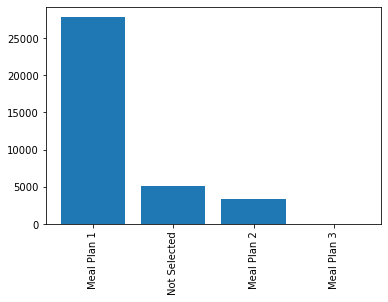

In [22]:
var = 'type_of_meal_plan'
diagramme_bar(var)

#### Observation1: Le repas du niveau de commodité 1 est fréquement commandé

#### Question2: Quelle est année pour laquelle il y'a eu plus de reservation?

#### Visualisation2: 

<AxesSubplot:ylabel='arrival_year'>

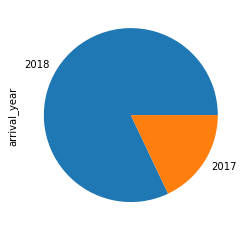

In [23]:
df_copy['arrival_year'].value_counts().plot(kind='pie')

#### Observation2: L'année 2018 est celle aucours de laquelle le client a plus fait des reservations

#### Question3: A Quelle période en termes de mois, le client arrive-t-il à l'hotel?

#### Visualisation2: Quel est le repas fréquemment commandé?

<BarContainer object of 12 artists>

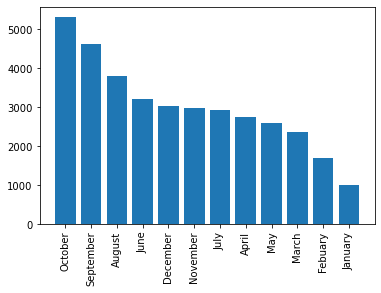

In [24]:
var ='arrival_month'
diagramme_bar(var)

#### Observation3: On constacte de Juin en Octobre, représente le moment pour lequel le client arrive à l'hotel

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  object 
 9   arrival_year                          36275 non-null  object 
 10  arrival_month                         36275 non-null  object 
 11  arrival_date   

#### Question4: Quel est le niveau de commodité par rapport au standing souvent préféré?

#### Visualisation4:

<BarContainer object of 7 artists>

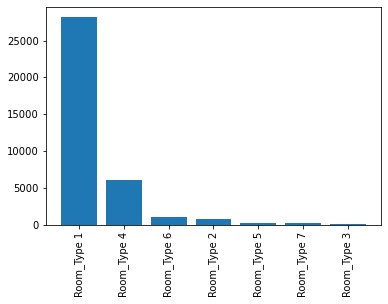

In [26]:
var = 'room_type_reserved'
diagramme_bar(var)

#### Observation4: Le client a généralement préféré le standing du type1 ou le type 4 mais rarement les types 6, 2 et 5 et presque jamais les types 7 et 3

#### Question5: Quel service le client a-t-il souvent sollicité?

#### Visualisation5

<BarContainer object of 5 artists>

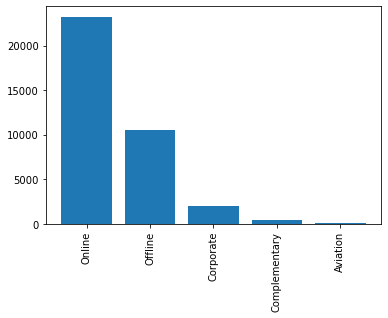

In [27]:
var ='market_segment_type'
diagramme_bar(var)

#### Observation5: Le client sollicite le plus le service en ligne

### Analyse des variables quatitatives

In [28]:
print(set(df_copy['no_of_children']))
print(set(df_copy['no_of_adults']))

{0, 1, 2, 3, 9, 10}
{0, 1, 2, 3, 4}


In [29]:
df_copy.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#### Ici, je ferai le commentaire ce soir

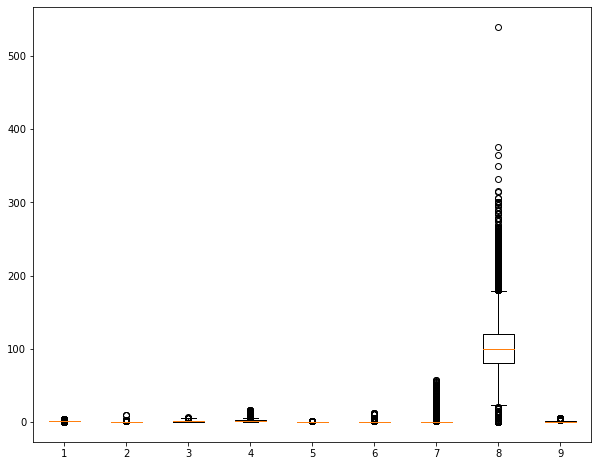

In [30]:
figure = plt.figure(figsize =(10, 8))
plt.boxplot(df_copy[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']])
plt.show()

#### J'expliquerai le traitement ce soir

In [31]:
numericals = ['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights','repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

In [32]:
for var in numericals:
    IQR = df_copy[var].quantile(0.75) - df_copy[var].quantile(0.25)
    Lower = df_copy[var].quantile(0.25) - (1.5*IQR)
    upper = df_copy[var].quantile(0.75) + (1.5*IQR)
    vec=df_copy[var].values
    for i in range(len(vec)):
        if(vec[i]>upper):
            vec[i]=upper
        if (vec[i]<Lower):
            vec[i]=Lower

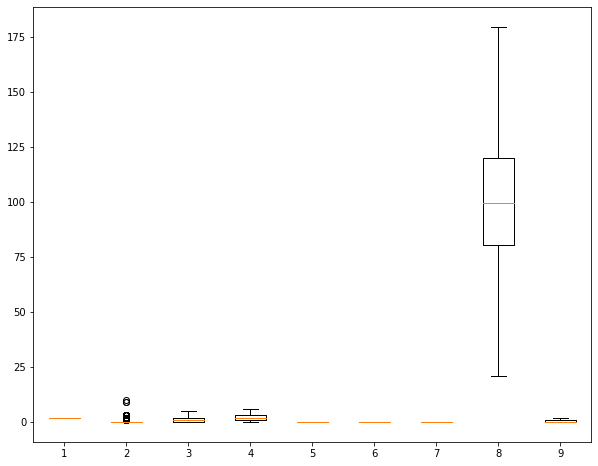

In [33]:
figure = plt.figure(figsize =(10, 8))
plt.boxplot(df_copy[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']])
plt.show()

In [34]:
df_copy.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.0,36275.000000,36275.000000,36275.000000,36275.0,36275.0,36275.0,36275.000000,36275.000000
mean,2.0,0.105279,0.810117,2.177836,0.0,0.0,0.0,102.970177,0.596085
std,0.0,0.402648,0.867339,1.290622,0.0,0.0,0.0,31.681213,0.723426
min,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.750000,0.000000
25%,2.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,80.300000,0.000000
50%,2.0,0.000000,1.000000,2.000000,0.0,0.0,0.0,99.450000,0.000000
75%,2.0,0.000000,2.000000,3.000000,0.0,0.0,0.0,120.000000,1.000000
max,2.0,10.000000,5.000000,6.000000,0.0,0.0,0.0,179.550000,2.000000


### Traitement des données sur l'hotel

In [35]:
type(liste_hotel)

list

In [36]:
dat={'hotel_name':liste_hotel}
hotel =pd.DataFrame(data= dat, columns=['hotel_name'])

In [37]:
hotel.head()

,hotel_name
0,Hotel Mont Fébé
1,Hilton Yaounde
2,Hotel Franco
3,YaahoT Hotel
4,Djeuga Palace


### Création du Trame final

In [38]:
df_final = df_copy.set_index(df_copy.index).join(hotel.set_index(hotel.index))

In [39]:
df_final.to_csv("data_end.csv") # Sauvegarde

# Contruction du système de recommation des hotels

### Préparation des données

In [40]:
df_cleaning = df_final.copy()

In [41]:
df_cleaning.drop(columns=['Booking_ID','repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], inplace=True)

In [42]:
df_cleaning=df_cleaning[df_cleaning['hotel_name'].isna() == False]

In [43]:
df_cleaning.tail(4)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status,hotel_name
46,2,0,0,2,Meal Plan 1,0,Room_Type 1,32,2017,November,20,Offline,73.0,0,Not_Canceled,Hôtel Le Monarque Palace
47,2,0,0,1,Meal Plan 2,0,Room_Type 1,55,2018,April,6,Offline,104.0,0,Not_Canceled,Hotel Residence Madadjeu
48,2,0,0,4,Not Selected,0,Room_Type 1,57,2018,November,1,Online,79.2,1,Not_Canceled,Mont Mandara
49,2,0,1,3,Meal Plan 1,0,Room_Type 4,7,2018,December,29,Online,125.8,2,Not_Canceled,Oveng Lodge


In [44]:
df_dumirised = pd.get_dummies(df_cleaning, columns=['required_car_parking_space','type_of_meal_plan','lead_time','room_type_reserved', 'arrival_month', 'arrival_year','arrival_date',
                                                   'market_segment_type', 'booking_status', 'hotel_name'])

In [45]:
set(df_dumirised.columns)

{'arrival_date_1',
 'arrival_date_10',
 'arrival_date_11',
 'arrival_date_13',
 'arrival_date_15',
 'arrival_date_17',
 'arrival_date_18',
 'arrival_date_19',
 'arrival_date_2',
 'arrival_date_20',
 'arrival_date_21',
 'arrival_date_22',
 'arrival_date_25',
 'arrival_date_26',
 'arrival_date_27',
 'arrival_date_28',
 'arrival_date_29',
 'arrival_date_30',
 'arrival_date_4',
 'arrival_date_5',
 'arrival_date_6',
 'arrival_date_7',
 'arrival_date_9',
 'arrival_month_April',
 'arrival_month_August',
 'arrival_month_December',
 'arrival_month_Febuary',
 'arrival_month_January',
 'arrival_month_July',
 'arrival_month_June',
 'arrival_month_March',
 'arrival_month_May',
 'arrival_month_November',
 'arrival_month_October',
 'arrival_month_September',
 'arrival_year_2017',
 'arrival_year_2018',
 'avg_price_per_room',
 'booking_status_Canceled',
 'booking_status_Not_Canceled',
 'hotel_name_Aurelia Palace ',
 'hotel_name_Central Hotel ',
 'hotel_name_Complexe Hotelier St Elie ',
 'hotel_name_Con

In [46]:
### Création du Trame des hotls similaires

In [47]:
hotel_similiaire = pd.DataFrame(index= df_dumirised.columns, columns=df_dumirised.columns)

In [48]:
hotel_similiaire.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'avg_price_per_room', 'no_of_special_requests',
       'required_car_parking_space_0', 'required_car_parking_space_1',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       ...
       'hotel_name_Oveng Lodge ', 'hotel_name_Prestige Hotel ',
       'hotel_name_Prodiges Hôtel ',
       'hotel_name_Résidences Micheline et Emile à Bastos ',
       'hotel_name_Safyad Hotel ', 'hotel_name_Somatel Yaoundé ',
       'hotel_name_Tchatcha Hotel ', 'hotel_name_Tou'Ngou Hotel ',
       'hotel_name_YaahoT Hotel ', 'hotel_name_residence le belvédère '],
      dtype='object', length=146)

In [49]:
df_dumirised.iloc[:,1].shape

(50,)

In [50]:
hotel_similiaire.columns.shape

(146,)

In [51]:
# remplire les similitudes
for i in range(0, len(hotel_similiaire.columns)):
    # on boucle à travers les colonnes pour chaque colonne
    for j in range(0, len(hotel_similiaire.columns)):
        hotel_similiaire.iloc[i,j]= 1-cosine(df_dumirised.iloc[:,i],df_dumirised.iloc[:,j])

In [52]:
# Creer des hotels en remplacement pour fermer les voisins d'un hotels
hotel_voisin =pd.DataFrame(index=hotel_similiaire.iloc[96:,].index, columns=[i for i in range(1,50)])

In [53]:
# Configuration de l'affichage 
pd.set_option('display.max_rows', None)

In [54]:
# On remplit les noms des hotels voisins
for i in range(0, 50):
    hotel_voisin.iloc[i, :49]=hotel_similiaire.iloc[96:,i].sort_values(ascending=False)[:49].index

In [55]:
hotel_voisin

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
hotel_name_Aurelia Palace,hotel_name_Aurelia Palace,hotel_name_Muraille Chambre d'hôtes Etoug-Ebe.,hotel_name_Hôtel de la Gare,hotel_name_Indra Hotel,hotel_name_La Couronne RW Hotel & Suites,hotel_name_Le Best Hotel,hotel_name_Le Luxtral Hôtel,hotel_name_Liza Hôtel,hotel_name_Location Appartement Meublé,hotel_name_Luxxor Hôtel,...,hotel_name_Hotel Franco,hotel_name_Hotel Jouvence 2000,hotel_name_Hotel Le Diplomate,hotel_name_Hotel Le Kremlin Yaounde,hotel_name_Hotel Le Relais Saint Jacques,hotel_name_Hotel Mansel,hotel_name_Hotel Meumi Palace,hotel_name_Hotel Mont Fébé,hotel_name_Hotel Residence Madadjeu,hotel_name_Hotel Santa Lucia
hotel_name_Central Hotel,hotel_name_La Couronne RW Hotel & Suites,hotel_name_Aurelia Palace,hotel_name_Muraille Chambre d'hôtes Etoug-Ebe.,hotel_name_Hôtel de la Gare,hotel_name_Indra Hotel,hotel_name_Le Best Hotel,hotel_name_Le Luxtral Hôtel,hotel_name_Liza Hôtel,hotel_name_Location Appartement Meublé,hotel_name_Luxxor Hôtel,...,hotel_name_Hotel Franco,hotel_name_Hotel Jouvence 2000,hotel_name_Hotel Le Diplomate,hotel_name_Hotel Le Kremlin Yaounde,hotel_name_Hotel Le Relais Saint Jacques,hotel_name_Hotel Mansel,hotel_name_Hotel Meumi Palace,hotel_name_Hotel Mont Fébé,hotel_name_Hotel Residence Madadjeu,hotel_name_Hotel Santa Lucia
hotel_name_Complexe Hotelier St Elie,hotel_name_Aurelia Palace,hotel_name_Liza Hôtel,hotel_name_Complexe Hotelier St Elie,hotel_name_Tchatcha Hotel,hotel_name_Hôtel JOUVENCE INTERNATIONAL,hotel_name_Central Hotel,hotel_name_Résidences Micheline et Emile à Bas...,hotel_name_Hôtel de la Gare,hotel_name_Prestige Hotel,hotel_name_Hilton Yaounde,...,hotel_name_Luxxor Hôtel,hotel_name_Location Appartement Meublé,hotel_name_Hotel Jouvence 2000,hotel_name_Le Luxtral Hôtel,hotel_name_Le Best Hotel,hotel_name_La Couronne RW Hotel & Suites,hotel_name_Indra Hotel,hotel_name_Hotel Le Kremlin Yaounde,hotel_name_Hôtel Le Monarque Palace,hotel_name_Hotel Mansel
hotel_name_Congress Hotel,hotel_name_Le Best Hotel,hotel_name_Tou'Ngou Hotel,hotel_name_Location Appartement Meublé,hotel_name_Hotel Mansel,hotel_name_Prestige Hotel,hotel_name_Mont Mandara,hotel_name_Aurelia Palace,hotel_name_Oveng Lodge,hotel_name_La Couronne RW Hotel & Suites,hotel_name_Hotel CST Hubert de Yaoundé,...,hotel_name_Hotel Le Relais Saint Jacques,hotel_name_Liza Hôtel,hotel_name_Le Luxtral Hôtel,hotel_name_Hotel Residence Madadjeu,hotel_name_Hotel Santa Lucia,hotel_name_Hôtel de la Gare,hotel_name_residence le belvédère,hotel_name_Hotel Exelle-Xior,hotel_name_Hotel Azur,hotel_name_Hotel Meumi Palace
hotel_name_Djeuga Palace,hotel_name_Florencia Hotel,hotel_name_Hotel Le Diplomate,hotel_name_Le Best Hotel,hotel_name_Oveng Lodge,hotel_name_Central Hotel,hotel_name_Tchatcha Hotel,hotel_name_Hôtel La Falaise,hotel_name_Le Luxtral Hôtel,hotel_name_Noblesse Hotel,hotel_name_Indra Hotel,...,hotel_name_Felydac Hotel,hotel_name_Hotel Jouvence 2000,hotel_name_Hotel Le Kremlin Yaounde,hotel_name_Complexe Hotelier St Elie,hotel_name_Hotel Le Relais Saint Jacques,hotel_name_Hôtel JOUVENCE INTERNATIONAL,hotel_name_Hotel Mont Fébé,hotel_name_Aurelia Palace,hotel_name_Hotel Mansel,hotel_name_Hotel Franco
hotel_name_Felicia Hotel,hotel_name_Luxxor Hôtel,hotel_name_Le Best Hotel,hotel_name_Oveng Lodge,hotel_name_Location Appartement Meublé,hotel_name_Hotel Exelle-Xior,hotel_name_Hôtel La Falaise,hotel_name_Central Hotel,hotel_name_Indra Hotel,hotel_name_La Couronne RW Hotel & Suites,hotel_name_Le Luxtral Hôtel,...,hotel_name_Hotel CST Hubert de Yaoundé,hotel_name_Hotel Franco,hotel_name_Liza Hôtel,hotel_name_Hotel Jouvence 2000,hotel_name_Hotel Le Kremlin Yaounde,hotel_name_Hotel Le Relais Saint Jacques,hotel_name_Hôtel de la Gare,hotel_name_Hôtel Le Monarque Palace,hotel_name_Hôtel JOUVENCE INTERNATIONAL,hotel_name_Hotel Meumi Palace
hotel_name_Felydac Hotel,hotel_name_Aurelia Palace,hotel_name_Central Hotel,hotel_name_Hôtel de la Gare,hotel_name_Indra Hotel,hotel_name_La Cour